In [5]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Algerian_forest_fires_cleaned_dataset.csv'

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df=df.drop(['day', 'month', 'year'],axis=1)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [ ]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [ ]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [ ]:
# Independent feature and dependent feature
x= df.drop('FWI',axis=1)
y=df['FWI']

In [ ]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [ ]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [ ]:
## Train test split
from sklearn.model_selection import train_test_split

In [ ]:
x_train ,x_test, y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
for i in [x_train ,x_test, y_train , y_test]:
    print(i.shape)

i (182, 11)
i (61, 11)
i (182,)
i (61,)


In [ ]:
# feature selection according to correaliton 
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


# Feature selection 

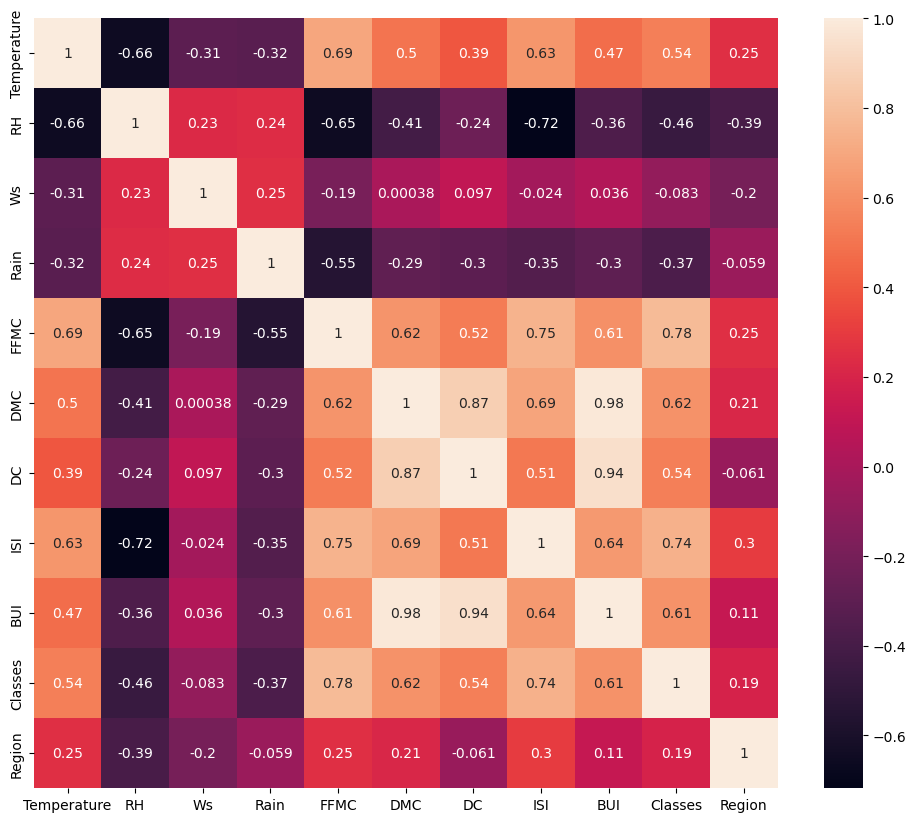

In [ ]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
sns.heatmap(x_train.corr(),annot=True)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr= set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):   
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name= corr_matrix.columns[i]
                col_corr.add(col_name)
                   
    return col_corr

In [ ]:
# Threshold--Domain Eperties  
corr_feature=correlation(x_train,0.85)

In [ ]:
corr_feature ## it means the columns which is correalated to each other 85%

{'BUI', 'DC'}

In [ ]:
# Drop feature when correlation is more than 0.85
x_train.drop(corr_feature,axis=1,inplace=True)
x_test.drop(corr_feature,axis=1,inplace=True)
x_train.shape,x_train.shape

((182, 9), (182, 9))

# Feature scaling or standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler= scaler.transform(x_test)

# Box Plots To understand Effect of Standard Scaler

/tmp/ipykernel_84/548146445.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


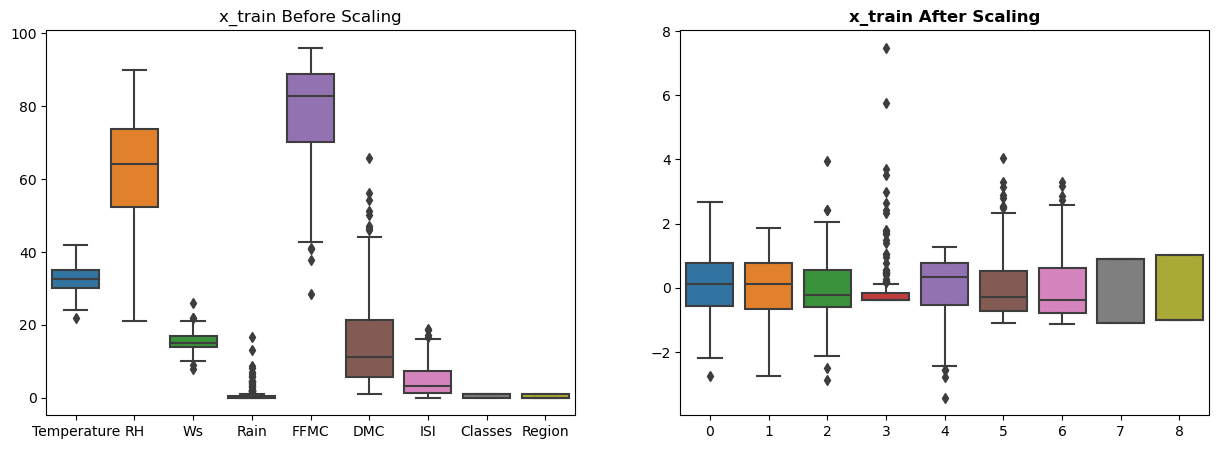

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaler)
plt.title('x_train After Scaling',weight='bold')
plt.show()

# Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaler,y_train)
y_pred=linreg.predict(x_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error',mae)
print("R2 score",score)

Mean absolute error 0.5468236465249985
R2 score 0.9847657384266951


# lasso Regression
**Used for Feature selection**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso=Lasso()
lasso.fit(x_train_scaler,y_train)
y_pred=lasso.predict(x_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error',mae)
print("R2 score",score)
y_pred

NameError: name 'x_train_scaler' is not defined

# Ridge Regression
**Used for Reducing overfitting**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge=Ridge()
ridge.fit(x_train_scaler,y_train)
y_pred=ridge.predict(x_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error',mae)
print("R2 score",score)

Mean absolute error 0.5642305340105692
R2 score 0.9842993364555513


## Saving Pickle file

In [ ]:
import pickle
pickle.dump(ridge,open('ridge.pkl','wb'))
pickle.dump(scaler,open('scaler1.pkl','wb'))